In [2]:
# By Chelsea Parlett-Pelleriti
library(ggplot2)
library(glmnet)

Loading required package: Matrix

Loaded glmnet 3.0-2




In [3]:
n = 10000 #number of samples per model
nsims = 1000 # number of simulations
lambda = 1

In [4]:
# simulate data and run linear, ridge, and lasso models
compare <- function(){
  # Real Variables
  A <- rnorm(n,0,1)
  E <- rnorm(n,0,1)
  I <- rnorm(n,0,1)
  O <- rnorm(n,0,1)
  U <- rnorm(n,0,1)
  Y <- rnorm(n,0,1)
  W <- rnorm(n,0,1)
  
  # Unrelated Variables
  B <- rnorm(n,0,1)
  C <- rnorm(n,0,1)
  D <- rnorm(n,0,1)
  G <- rnorm(n,0,1)
  H <- rnorm(n,0,1)
  J <- rnorm(n,0,1)
  K <- rnorm(n,0,1)
  L <- rnorm(n,0,1)
  M <- rnorm(n,0,1)
  N <- rnorm(n,0,1)
  
  # Outcome (CHANGE RELATIONSHIPS HERE)
  X <- 100 + A*8.23 + E*3.48 + 
    I*2.97 + O*5.12 + U*7.83 +
    Y*12.34 + W*1.38 + rnorm(n,0,15)
  
  # Data Frame
  df <- data.frame(A,E,I,O,U,B,C,D,G,H,J,K,L,M,N,Y,W,X)
  
  lr <- lm(X ~ A + B + C + D + E + G + H + I + J + K + L + M + N + O + U + Y + W,
           data = df)
  lr.co <- coef(lr)
  
  lasso <- glmnet(as.matrix(df[,1:17]), df[, 18], alpha = 1, lambda = lambda)
  lasso.co <- coef(lasso)
  
  ridge <- glmnet(as.matrix(df[,1:17]), df[, 18], alpha = 0, lambda = lambda)
  ridge.co <- coef(ridge)
  
  conames <- c(names(lr.co), lasso.co@Dimnames[[1]],ridge.co@Dimnames[[1]])
  lasso.coefs <- rep(0,18)
  
  lasso.coefs[lasso.co@i+1] <- lasso.co@x
  coefs <- c(as.numeric(lr.co),lasso.coefs, ridge.co@x)
  
  model <- c(rep("linear", 18), rep("lasso", 18), rep("ridge", 18))
  
  return(data.frame(conames,coefs,model))
}

In [5]:
# run simulation
sim <- lapply(1:nsims,function(x) compare())
sim <- do.call(rbind,sim)

sim$conames <- factor(sim$conames, levels = c("A", "E", "I", "O", "U", "Y", "W",
                                              "B","C","D","G","H","J","K","L", "M","N"))

sim$vowel <- ifelse(sim$conames %in% c("A","E","I","O","U","Y", "W"), 1,0)

The plots below look at the range of values the coefficients for each effect took on over the `nsim` simulations. 

By default, coefficients represented by vowels (A, E, I ,O , U, and sometimes Y and W...does anyone else remember that rhyme?) DO have true population effects that are > 0. Consonants have no effect in the population.

Interestingly, we can see that in effects that are real (vowels), we see that lasso has lower estimates in general, ridge has slightly higher estimates than lasso, and linear regression has the highest coefficients. I think this shows clearly the some of the differences between Ridge and LASSO.

In coefficients that have no real effect, LASSO almost ALWAYS has them at exactly 0. Whereas linear and Ridge regression have more variation, allowing the coefficients to be small, but non-zero.

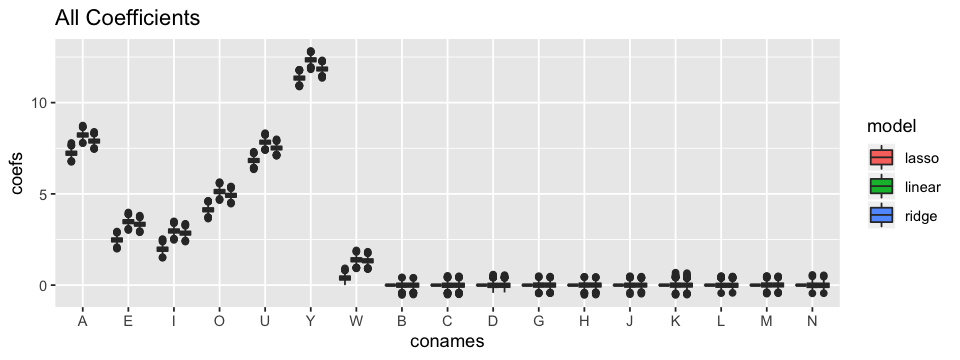

In [6]:
# All Coefficients
options(repr.plot.width=8, repr.plot.height=3)
ggplot(sim[sim$conames %in% c("A", "E", "I", "O", "U", "Y", "W",
                              "B","C","D","G","H","J","K","L", "M","N"),], aes(x = conames,
                                           y = coefs,
                                           fill = model)) +
  geom_boxplot() + ggtitle("All Coefficients")

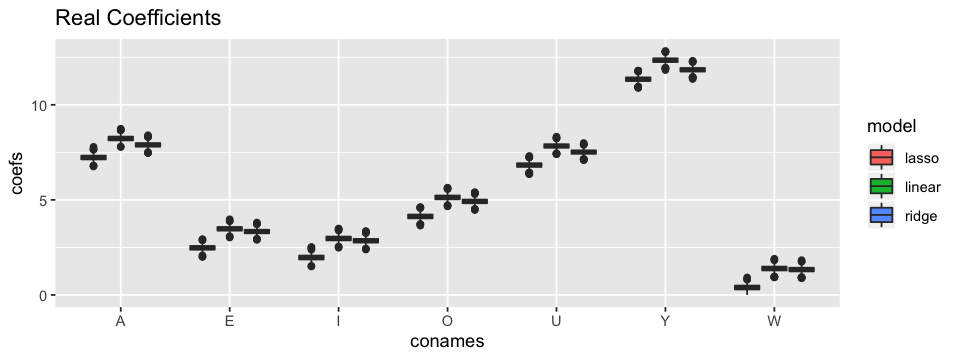

In [7]:
#just vowels (actual effects)
ggplot(sim[sim$conames %in% c("A", "E", "I", "O", "U", "Y", "W"),], aes(x = conames,
                                                                               y = coefs,
                                                                               fill = model)) +
  geom_boxplot() + ggtitle("Real Coefficients")


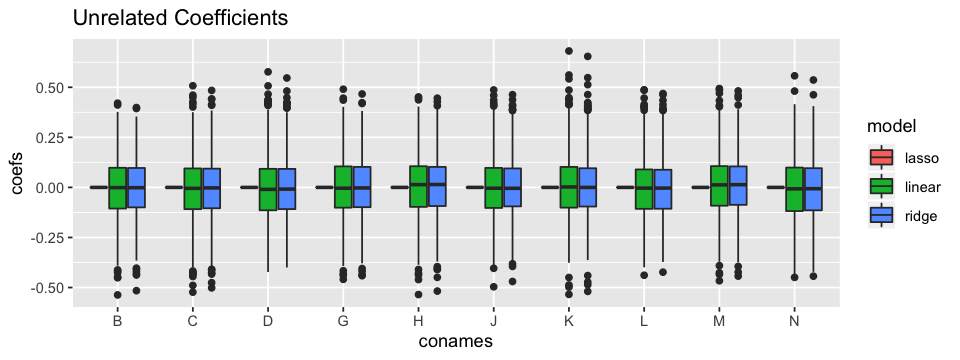

In [8]:
#just consonants (no real effects)

ggplot(sim[sim$conames %in% c("B","C","D","G","H","J","K","L", "M","N"),], aes(x = conames,
                                                                               y = coefs,
                                                                               fill = model)) +
  geom_boxplot() + ggtitle("Unrelated Coefficients")